In [1]:
import cv2
import numpy as np
import types
import matplotlib.pyplot as plt

Defina uma função para converter qualquer tipo de dado em binário, usaremos isso para converter os dados secretos e os valores de pixel em binário na fase de codificação e decodificação.

In [2]:
def messageToBinary(message):
  if type(message) == str:
    return ''.join([ format(ord(i), "08b") for i in message ])
  elif type(message) == bytes or type(message) == np.ndarray:
    return [ format(i, "08b") for i in message ]
  elif type(message) == int or type(message) == np.uint8:
    return format(message, "08b")
  else:
    raise TypeError("Tipo inserido não suportado!")

Função para ocultar a mensagem secreta na imagem alterando o LSB

In [3]:
def hideData(image, secret_message):

 # calcula o máximo de bytes a codificar
  n_bytes = image.shape[0] * image.shape[1] * 3 // 8
  print("Máximo de bytes para codificar:", n_bytes)

  #Verifica se o número de bytes a codificar é menor que o máximo de bytes na imagem
  if len(secret_message) > n_bytes:
      raise ValueError("Erro encontrado bytes insuficientes, precisa de imagem maior ou menos dados")

  secret_message += "#####" # você pode usar qualquer string como delimitador

  data_index = 0
 # converte os dados de entrada para o formato binário usando a função messageToBinary()
  binary_secret_msg = messageToBinary(secret_message)

  data_len = len(binary_secret_msg) #Encontre o comprimento dos dados que precisam ser ocultados
  for values in image:
      for pixel in values:
          # converte valores RGB para formato binário
          r, g, b = messageToBinary(pixel)
          # modifique o bit menos significativo somente se ainda houver dados para armazenar
          if data_index < data_len:
              # esconde os dados no bit menos significativo do pixel vermelho
              pixel[0] = int(r[:-1] + binary_secret_msg[data_index], 2)
              data_index += 1
          if data_index < data_len:
              # esconde os dados no bit menos significativo do pixel verde
              pixel[1] = int(g[:-1] + binary_secret_msg[data_index], 2)
              data_index += 1
          if data_index < data_len:
              # ocultar os dados no bit menos significativo do pixel azul
              pixel[2] = int(b[:-1] + binary_secret_msg[data_index], 2)
              data_index += 1
          # se os dados estiverem codificados, apenas saia do loop
          if data_index >= data_len:
              break

  return image

In [4]:
def showData(image):

  binary_data = ""
  for values in image:
      for pixel in values:
          r, g, b = messageToBinary(pixel) #converte os valores vermelho, verde e azul em formato binário
          binary_data += r[-1] #extraindo dados do bit menos significativo do pixel vermelho
          binary_data += g[-1] #extraindo dados do bit menos significativo do pixel verde
          binary_data += b[-1] #extraindo dados do bit menos significativo do pixel azul
  # dividido por 8 bits
  all_bytes = [ binary_data[i: i+8] for i in range(0, len(binary_data), 8) ]
  # converte de bits para caracteres
  decoded_data = ""
  for byte in all_bytes:
      decoded_data += chr(int(byte, 2))
      if decoded_data[-5:] == "#####": #verifica se atingimos o delimitador que é "#####"
          break
  #print(decoded_data)
  return decoded_data[:-5] #remova o delimitador para mostrar a mensagem oculta original

In [9]:
def encode_text():
  image_name = input("Digite o nome da imagem (com extensão): ")
  image = cv2.imread(image_name) # Leia a imagem de entrada usando OpenCV
  #É uma biblioteca de ligações Python projetada para resolver problemas de visão computacional.

  print("A forma da imagem é: ",image.shape) #verifique a forma da imagem para calcular o número de bytes nela
  print("A imagem original é como mostrado abaixo: ")
  resized_image = cv2.resize(image, ( 500,500)) #redimensione a imagem conforme sua necessidade
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.show()


  data = input("Digite os dados a serem codificados: ")
  if (len(data) == 0):
    raise ValueError('Os dados estão vazios')

  filename = input("Digite o nome da nova imagem codificada (com extensão): ")
  encoded_image = hideData(image, data) # chame a função hideData para esconder a mensagem secreta na imagem selecionada
  cv2.imwrite(filename, encoded_image)

In [10]:
def decode_text():
  # leia a imagem que contém a imagem oculta
  image_name = input("Digite o nome da imagem esteganografada que você deseja decodificar (com extensão):")
  image = cv2.imread(image_name) #leia a imagem usando cv2.imread()

  print("A imagem esteganografada é a seguinte: ")
  resized_image = cv2.resize(image, ( 500,500))  #redimensionamento a imagem original conforme sua necessidade
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.show()

  text = showData(image)
  return text

Esteganografia de imagem 
 1. Codifique os dados 
 2. Decodifique os dados 
 Sua entrada é: 1

Codificação....
Digite o nome da imagem (com extensão): /content/pikachu.png
A forma da imagem é:  (500, 500, 3)
A imagem original é como mostrado abaixo: 


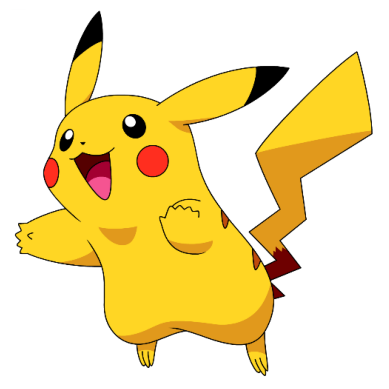

Digite os dados a serem codificados: diga la
Digite o nome da nova imagem codificada (com extensão): pikachu2.png
Máximo de bytes para codificar: 93750


In [11]:
def Steganography():
    a = input("Esteganografia de imagem \n 1. Codifique os dados \n 2. Decodifique os dados \n Sua entrada é: ")
    userinput = int(a)
    if (userinput == 1):
      print("\nCodificação....")
      encode_text()

    elif (userinput == 2):
      print("\nDecodificação....")
      print("A mensagem decodificada é: " + decode_text())
    else:
        raise Exception("Digite a mensagem correta")

Steganography()

In [ ]:
Steganography()